In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load 
city_data_to_load='Resources/city_data.csv'
ride_data_to_load='Resources/ride_data.csv'

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data=pd.read_csv(city_data_to_load)
city_data.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data=pd.read_csv(ride_data_to_load)
ride_data.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null.
city_data.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# Get the data types of each column.
city_data.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values pf the type of city.
city_data['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities.
sum(city_data['type']=='Rural')

18

In [9]:
# Get the columns and the rows that are not null.
ride_data.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
# Get the columns and the rows that are not null.
ride_data.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
# Get the data types of each column.
ride_data.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
# Combine the data into single dataset
pyber_data=pd.merge(ride_data, city_data, how='left',on=['city','city'])

# Display the DataFrame
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [ ]:
# Challenge Part 1

In [64]:
type_df=pyber_data.groupby(['type']).count()
type_df

,city,date,fare,ride_id,driver_count
type,,,,,
Rural,125,125,125,125,125
Suburban,625,625,625,625,625
Urban,1625,1625,1625,1625,1625


In [61]:
total_rides=pyber_data.groupby(['type']).count()['ride_id']
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [74]:
total_drivers=city_data.groupby(['type']).sum()['driver_count']
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [65]:
total_fares=pyber_data.groupby(['type']).sum()['fare']
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [66]:
aver_fare_ride=pyber_data.groupby(['type']).mean()['fare']
aver_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [75]:
aver_fare_driver=(total_fares/total_drivers)
aver_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [77]:
pyber_summary=pd.DataFrame({
    'Total Rides':total_rides,
    'Total Drivers':total_drivers,
    'Total Fares':total_fares,
    'Average Fare per Ride':aver_fare_ride,
    'Average Fare per Driver':aver_fare_driver
})
pyber_summary['Total Rides']=pyber_summary['Total Rides'].map('{:,}'.format)
pyber_summary['Total Drivers']=pyber_summary['Total Drivers'].map('{:,}'.format)
pyber_summary['Total Fares']=pyber_summary['Total Fares'].map('${:,.2f}'.format)
pyber_summary['Average Fare per Ride']=pyber_summary['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary['Average Fare per Driver']=pyber_summary['Average Fare per Driver'].map('${:,.2f}'.format)
del pyber_summary.index.name
pyber_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [ ]:
# Challenge Part 2

In [102]:
pyber_data=pd.merge(ride_data, city_data, how='left',on=['city','city'])
pyber_data=pyber_data.rename(columns={'city': 'City', 'date':'Date','fare':'Fare', 
            'ride_id': 'Ride Id','driver_count': 'No. Drivers', 
            'type':'City Type'})
pyber_data.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [109]:
new_pyber_data=pyber_data.set_index(pd.DatetimeIndex(pyber_data['Date']))
new_pyber_data

,City,Date,Fare,Ride Id,No. Drivers,City Type
Date,,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural


In [121]:
pyber_df=new_pyber_data[['City Type','Fare']].copy()
pyber_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [122]:
pyber_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [123]:
pyber_df=pyber_df.groupby(['City Type','Date']).sum()
pyber_df

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [124]:
pyber_df=pyber_df.reset_index()
pyber_df

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [125]:
pyber_table=pd.pivot_table(pyber_df,index=['Date'], columns=['City Type'])

In [126]:
pyber_table

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [129]:
pyber_table=pyber_table.loc['2019-01-01':'2019-04-28']
pyber_table

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [130]:
pyber_table=pyber_table.resample('W').sum()

In [141]:
new_pyber_table=pyber_table.reset_index()
new_pyber_table

Date    Fare                  
City Type              Rural Suburban    Urban
0         2019-01-06  187.92   721.60  1661.68
1         2019-01-13   67.65  1105.13  2050.43
2         2019-01-20  306.00  1218.20  1939.02
3         2019-01-27  179.69  1203.28  2129.51
4         2019-02-03  333.08  1042.79  2086.94
5         2019-02-10  115.80   974.34  2162.64
6         2019-02-17   95.82  1045.50  2235.07
7         2019-02-24  419.06  1412.74  2466.29
8         2019-03-03  175.14   858.46  2218.20
9         2019-03-10  303.94   925.27  2470.93
10        2019-03-17  163.39   906.20  2044.42
11        2019-03-24  189.76  1122.20  2368.37
12        2019-03-31  199.42  1045.06  1942.77
13        2019-04-07  501.24  1010.73  2356.70
14        2019-04-14  269.79   784.82  2390.72
15        2019-04-21  214.14  1149.27  2303.80
16        2019-04-28  191.85  1357.75  2238.29

In [133]:
import matplotlib.style as style

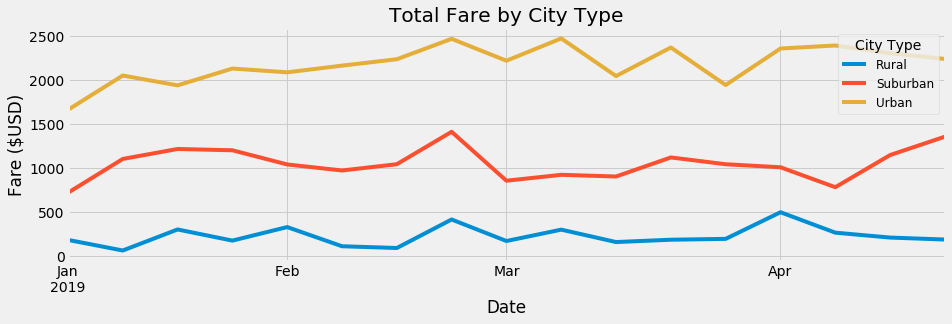

In [163]:
plt.style.use('fivethirtyeight')
pyber_table.plot(figsize=(14,4),label=['Rural','Suburban','Urban'])
L=plt.legend(fontsize='12', loc='best',title='City Type')
L.get_texts()[0].set_text('Rural')
L.get_texts()[1].set_text('Suburban')
L.get_texts()[2].set_text('Urban')
plt.xlabel("Date")
plt.ylabel('Fare ($USD)')
plt.title('Total Fare by City Type')
plt.savefig('analysis/Fig8.png')
plt.show()